In [31]:
import pandas as pd
import numpy as np
import torch
import umap

from torch import nn
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
import matplotlib.cm as cm

from rdkit.Chem import MolFromSmiles, DataStructs
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [2]:
w = torch.load('../analysis/DDC_BDB_best_epoch_30.ckpt', map_location=torch.device('cpu'))

In [3]:
d_enc = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Dropout(0.2),
                      nn.Linear(1024, 1024), nn.ReLU(), nn.Dropout(0.2),
                      nn.Linear(1024, 1024), nn.ReLU(), nn.Dropout(0.2),
                      nn.Linear(1024, 1024), nn.ReLU(), nn.Dropout(0.2))

In [4]:
d_enc.load_state_dict({k[10:]: v for k, v in w['state_dict'].items() if k.startswith('d_encoder')}, strict=False)

<All keys matched successfully>

In [6]:
d_enc.eval()

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=1024, out_features=1024, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=1024, out_features=1024, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=1024, out_features=1024, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.2, inplace=False)
)

In [7]:
bdb_ddc = pd.read_csv('../analysis/bindingdb_ki_cliff_pairs_ta1_ts0.9_r_wt.csv')

In [8]:
bdb_ddc

,drug1,drug2,smiles1,smiles2,cliff,target,split
0,"Azabicyclooctane scaffold, 14l::N-[(3aR,6S,6aS...","Azabicyclooctane scaffold, 14p::N-[(3aR,6S,6aS...",CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H]2CC[C@H](...,CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H]2CC[C@H](...,0,48,0
1,"US8952157, 140::US9303025, 140","US8952157, 133::US9303025, 133",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
2,"US8623889, 33","US8623889, 46",O=C(Nc1cc2ccc(cc2cn1)N1CCCC1)C1CC1,O=C(Nc1cc2ccc(cc2cn1)N1CCNCC1)C1CC1,1,70,0
3,2-(hydrazinecarbonyl)-3-(2-methylphenyl)-1H-in...,3-(2-fluorophenyl)-2-(hydrazinecarbonyl)-1H-in...,Cc1ccccc1-c1c([nH]c2ccc(cc12)S(N)(=O)=O)C(=O)NN,NNC(=O)c1[nH]c2ccc(cc2c1-c1ccccc1F)S(N)(=O)=O,0,467,0
4,VIP [D- Arg14]::VIP [D-Arg14],VIP [D- Asn24]::VIP [D-Asn24],CC[C@H](C)[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC(...,CC[C@H](C)[C@H](NC(=O)[C@H](CO)NC(=O)[C@@H](CC...,1,376,0
...,...,...,...,...,...,...,...
252798,"(phenylmethyl) N-[[(6aR,9S,10aR)-4,7-dimethyl-...","(phenylmethyl) N-[[(6aR,9S,10aR)-4,7-dimethyl-...",CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@H]2[C@H]1Cc1cn...,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@H]2[C@H]1Cc1cn...,0,602,2
252799,"US9062078, 69::US9475819, 69::US9637496, 69::U...","US9062078, 177::US9475819, 177::US9637496, 177...",Cc1cc(on1)-c1ccc(C)nc1C(=O)N1C2CCC1C(COc1ccc(F...,Cc1coc(n1)-c1ccc(C)nc1C(=O)N1C2CCC1C(COc1ccc(F...,0,449,2
252800,"US9120756, 12","US9120756, 13",CC(C(=O)NCc1cc(nn1-c1ccc(C)cc1)C(C)(C)C)c1ccc(...,CC(C(=O)NCc1cc(nn1-c1ccc(cc1)C(C)(C)C)C(C)(C)C...,0,326,2
252801,"US9067949, 189","US9067949, 209",COc1cc(cc2c3CNCCc3oc12)S(=O)(=O)c1ccc(Cl)cc1,Fc1ccc(cc1)S(=O)(=O)c1cc(C#N)c2oc3CCNCc3c2c1,1,290,2


In [9]:
target_pairs_count = bdb_ddc.groupby('target').apply(lambda x: x[['drug1', 'drug2']].apply(frozenset, axis=1).nunique())

C:\Users\regin\AppData\Local\Temp\ipykernel_8196\936879337.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  target_pairs_count = bdb_ddc.groupby('target').apply(lambda x: x[['drug1', 'drug2']].apply(frozenset, axis=1).nunique())


In [10]:
target_pairs_count

target
0       27
1      198
2        3
3      291
4       20
      ... 
671      1
672      2
673      1
674      1
675    114
Length: 676, dtype: int64

# target 669 

In [173]:
t669 = bdb_ddc[bdb_ddc['target'] == 669]

In [174]:
t669['drug1'].value_counts()

drug1
US10213433, Compound 18::US11369599, Compound 18::US9125913, 177::US9174982, 18                                                                    370
US9125913, 310::US9125913, 312                                                                                                                     319
US10213433, Compound 89::US11369599, Compound 89::US9125913, 173::US9174982, 89                                                                    312
ABT-199::BDBM189459::US10213433, Compound 5::US10377755, Example ABT-199::US11318134, Example ABT-199::US11369599, Compound 369::US9174982, 369    297
US10213433, Compound 91::US11369599, Compound 91::US9125913, 174::US9174982, 91                                                                    263
                                                                                                                                                  ... 
US9125913, 65                                                                           

In [175]:
t669[t669['drug1']=='US10213433, Compound 18::US11369599, Compound 18::US9125913, 177::US9174982, 18']['cliff'].value_counts()

cliff
0    223
1    147
Name: count, dtype: int64

In [176]:
t669_d1_d = t669[t669['drug1']=='US10213433, Compound 18::US11369599, Compound 18::US9125913, 177::US9174982, 18']

In [177]:
t669_d1_d

,drug1,drug2,smiles1,smiles2,cliff,target,split
420,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 232",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
1012,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 315::US11369599, Compound...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CC2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
1101,"US10213433, Compound 18::US11369599, Compound ...","US8952157, 141::US9303025, 141",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
3009,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 37::US11369599, Compound ...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
3768,"US10213433, Compound 18::US11369599, Compound ...","US8952157, 302::US9303025, 302",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0
...,...,...,...,...,...,...,...
248329,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 21::US11369599, Compound ...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,1,669,2
248721,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 456",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,1,669,2
248742,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 178::US9174982, 19",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,2
249512,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 24::US11369599, Compound ...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,2


In [178]:
dr1_r = pd.DataFrame({'drug1': ['US10213433, Compound 18::US11369599, Compound 18::US9125913, 177::US9174982, 18'], 
                   'drug2': ['US10213433, Compound 18::US11369599, Compound 18::US9125913, 177::US9174982, 18'], 
                   'cliff': [2], # setting cliff to be different from others
                   'target': [669], 
                   'smiles1': ['CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3ccc(NCC4CCOCC4)c(c3)[N+]([O-])=O)c(Oc3ccc4[nH]ccc4c3)c2)=C(C1)c1ccc(Cl)cc1'], 
                   'smiles2': ['CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3ccc(NCC4CCOCC4)c(c3)[N+]([O-])=O)c(Oc3ccc4[nH]ccc4c3)c2)=C(C1)c1ccc(Cl)cc1']})

t669_d1_d = pd.concat([t669_d1_d, dr1_r], axis=0)

In [179]:
t669_d1_d

,drug1,drug2,smiles1,smiles2,cliff,target,split
420,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 232",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0.0
1012,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 315::US11369599, Compound...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CC2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0.0
1101,"US10213433, Compound 18::US11369599, Compound ...","US8952157, 141::US9303025, 141",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0.0
3009,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 37::US11369599, Compound ...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0.0
3768,"US10213433, Compound 18::US11369599, Compound ...","US8952157, 302::US9303025, 302",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,0.0
...,...,...,...,...,...,...,...
248721,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 456",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,1,669,2.0
248742,"US10213433, Compound 18::US11369599, Compound ...","US9125913, 178::US9174982, 19",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,2.0
249512,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 24::US11369599, Compound ...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,0,669,2.0
251674,"US10213433, Compound 18::US11369599, Compound ...","US10213433, Compound 276::US11369599, Compound...",CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,1,669,2.0


In [180]:
smiles_l = t669_d1_d['smiles2'].tolist()

In [181]:
features_l = []
for s in smiles_l:    
    mol = MolFromSmiles(s)
    if mol is not None:
        fp = GetMorganFingerprintAsBitVect(mol, 2, 1024)
        arr = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, arr)
        features_l.append(torch.tensor(arr, dtype=torch.float32))
    else:
        print(s)

In [182]:
features_l

[tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 1.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 1.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 1.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0.,

In [184]:
torch.stack(features_l)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [185]:
out_669 = d_enc(torch.stack(features_l)).detach().numpy()

In [186]:
out_669.shape

(371, 1024)

In [187]:
u_669 = umap.UMAP(random_state=42)

In [191]:
umap_res_669 = u_669.fit_transform(out_669)

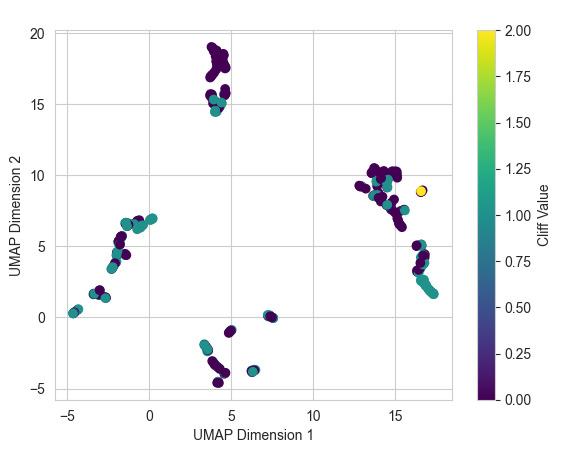

In [192]:
plt.scatter(umap_res_669[:, 0], umap_res_669[:, 1], c = t669_d1_d['cliff'], cmap='viridis')
plt.title(' ')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cliff Value')
plt.show()

trying another target

# Target 517

In [47]:
t517 = bdb_ddc[bdb_ddc['target'] == 517]

In [48]:
t517['drug1'].value_counts()

drug1
US9079866, 44::US9745328, Compound 44::US9884878, Compound 44       72
US9079866, 43::US9745328, Compound 43::US9884878, Compound 43       72
US9079866, 48::US9745328, Compound 48::US9884878, Compound 48       66
US9079866, 46::US9745328, Compound 46::US9884878, Compound 46       66
US9079866, 53::US9745328, Compound 53::US9884878, Compound 53       65
                                                                    ..
US9073876, 283::US9732093, Compound 283                              1
US9073876, 143::US9732093, Compound 143                              1
US9079866, 326::US9745328, Compound 326::US9884878, Compound 326     1
US9079866, 736::US9745328, Compound 736::US9884878, Compound 736     1
US9073876, 315::US9732093, Compound 315                              1
Name: count, Length: 1264, dtype: int64

In [51]:
t517[t517['drug1']=='US9079866, 44::US9745328, Compound 44::US9884878, Compound 44']['cliff'].value_counts()

cliff
0    44
1    28
Name: count, dtype: int64

In [53]:
t517_d1_d = t517[t517['drug1']=='US9079866, 44::US9745328, Compound 44::US9884878, Compound 44']
t517_d1_d

,drug1,drug2,smiles1,smiles2,cliff,target,split
7099,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 361::US9745328, Compound 361::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ccc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCC...,0,517,0
8064,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 310::US9745328, Compound 310::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1ccccc1NS(=O)(=O)N1CC...,1,517,0
9855,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 828::US9745328, Compound 828::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1cccnc1S(=O)(=O)C1CC1,1,517,0
11267,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 579::US9745328, Compound 579::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1nc(cs1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCCC1,1,517,0
16653,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 303::US9745328, Compound 303::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,1,517,0
...,...,...,...,...,...,...,...
239652,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 831::US9745328, Compound 831::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1cccnc1S(=O)(=O)C1CCOCC1,1,517,2
242041,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 805::US9745328, Compound 805::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1cccnc1S(=O)(=O)C1CCC1,0,517,2
243930,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 718::US9745328, Compound 718::US988...",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)c1ncccn1,1,517,2
246476,"US9079866, 44::US9745328, Compound 44::US98848...","US9079866, 809::US9884878, Compound 809",Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1,Nc1ncc(cn1)-c1ccc(cc1F)-c1cccnc1S(=O)(=O)C1CCCC1,0,517,2


In [54]:
dr1 = pd.DataFrame({'drug1': ['US9079866, 44::US9745328, Compound 44::US9884878, Compound 44'], 
                   'drug2': ['US9079866, 44::US9745328, Compound 44::US9884878, Compound 44'], 
                   'cliff': [2], 
                   'target': [517], 
                   'smiles1': ['Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1'], 
                   'smiles2': ['Nc1cnc(cn1)-c1ccc(cc1F)-c1ccccc1S(=O)(=O)N1CCOCC1']})

t517_d1_d = pd.concat([t517_d1_d, dr1], axis=0)

In [55]:
smiles = t517_d1_d['smiles2'].tolist()

In [56]:
features = []
for s in smiles:    
    mol = MolFromSmiles(s)
    if mol is not None:
        fp = GetMorganFingerprintAsBitVect(mol, 2, 1024)
        arr = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, arr)
        features.append(torch.tensor(arr, dtype=torch.float32))
    else:
        print(s)

In [57]:
out = d_enc(torch.stack(features)).detach().numpy()

In [127]:
u1 = umap.UMAP(random_state=42)
umap_res1 = u1.fit_transform(out)

C:\Users\regin\Documents\git\AC-DTI\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


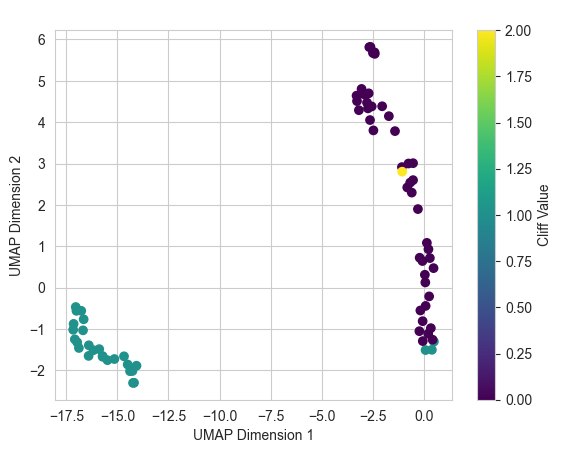

In [128]:
plt.scatter(umap_res1[:, 0], umap_res1[:, 1], c = t517_d1_d['cliff'], cmap='viridis')
plt.title(' ')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cliff Value')
plt.show()

In [129]:
u_init = umap.UMAP(random_state=42)
umap_res_init = u_init.fit_transform(features)

C:\Users\regin\Documents\git\AC-DTI\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


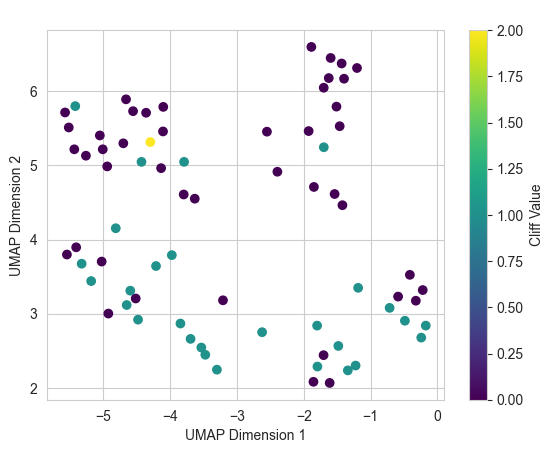

In [130]:
plt.scatter(umap_res_init[:, 0], umap_res_init[:, 1], c = t517_d1_d['cliff'], cmap='viridis')
plt.title(' ')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cliff Value')
plt.show()

In [63]:
d_enc

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=1024, out_features=1024, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=1024, out_features=1024, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=1024, out_features=1024, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.2, inplace=False)
)

In [68]:
d_enc_remove_last = d_enc[:-3]

In [69]:
d_enc_remove_last

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=1024, out_features=1024, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=1024, out_features=1024, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
)

In [131]:
out_remove_last = d_enc_remove_last(torch.stack(features)).detach().numpy()
u_rl = umap.UMAP(random_state=42)
umap_res_rl = u_rl.fit_transform(out_remove_last)

C:\Users\regin\Documents\git\AC-DTI\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [74]:
d_enc_remove_2last = d_enc[:-6]

In [75]:
d_enc_remove_2last

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=1024, out_features=1024, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
)

In [133]:
out_remove_2last = d_enc_remove_2last(torch.stack(features)).detach().numpy()
u_r2l = umap.UMAP(random_state=42)
umap_res_r2l = u_r2l.fit_transform(out_remove_2last)

C:\Users\regin\Documents\git\AC-DTI\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [79]:
d_enc_remove_3last = d_enc[:-9]

In [80]:
d_enc_remove_3last

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
)

In [135]:
out_remove_3last = d_enc_remove_3last(torch.stack(features)).detach().numpy()
u_r3l = umap.UMAP(random_state=42)
umap_res_r3l = u_r3l.fit_transform(out_remove_3last)

C:\Users\regin\Documents\git\AC-DTI\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


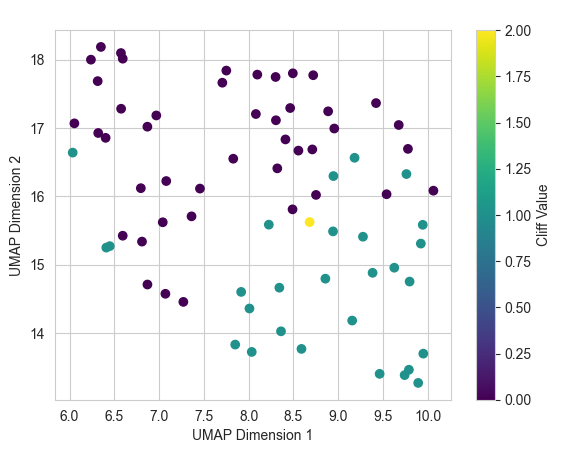

In [136]:
plt.scatter(umap_res_r3l[:, 0], umap_res_r3l[:, 1], c = t517_d1_d['cliff'], cmap='viridis')
plt.title(' ')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cliff Value')
plt.show()

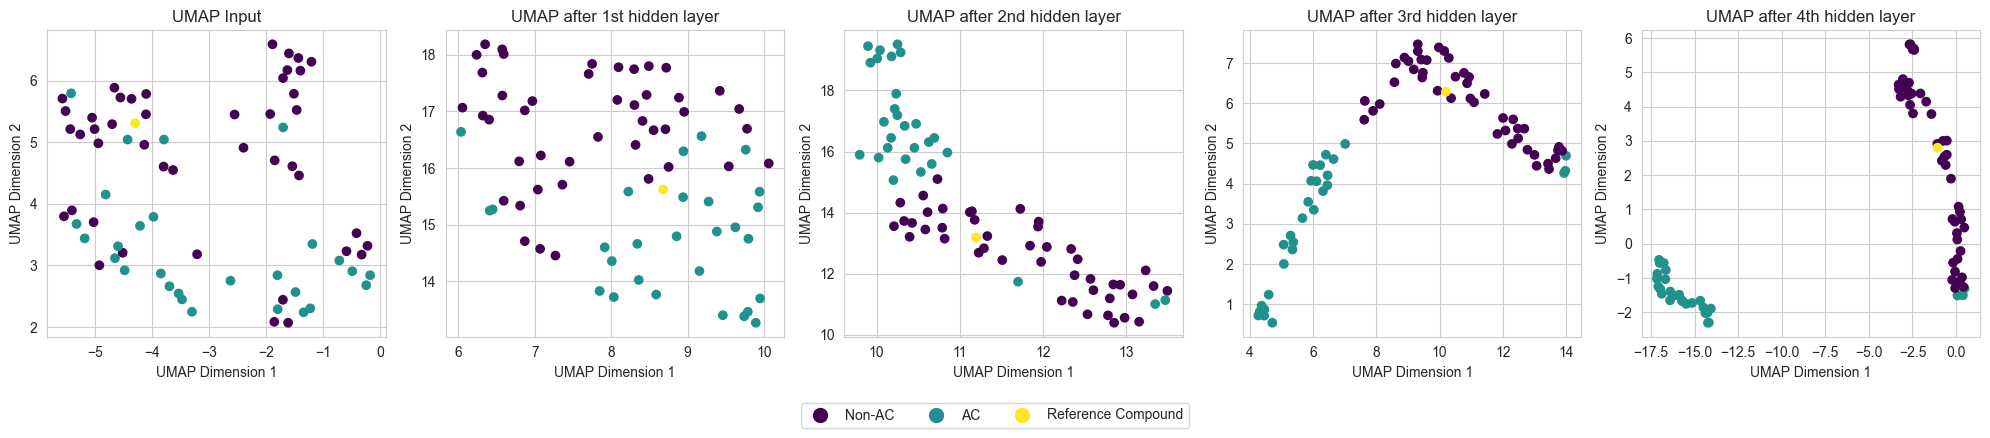

In [203]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

scatter0 = axes[0].scatter(umap_res_init[:, 0], umap_res_init[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('UMAP Input')
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')

scatter1 = axes[1].scatter(umap_res_r3l[:, 0], umap_res_r3l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('UMAP after 1st hidden layer')
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

scatter2 = axes[2].scatter(umap_res_r2l[:, 0], umap_res_r2l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[2].set_title('UMAP after 2nd hidden layer')
axes[2].set_xlabel('UMAP Dimension 1')
axes[2].set_ylabel('UMAP Dimension 2')

scatter3 = axes[3].scatter(umap_res_rl[:, 0], umap_res_rl[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[3].set_title('UMAP after 3rd hidden layer')
axes[3].set_xlabel('UMAP Dimension 1')
axes[3].set_ylabel('UMAP Dimension 2')

scatter4 = axes[4].scatter(umap_res1[:, 0], umap_res1[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[4].set_title('UMAP after 4th hidden layer')
axes[4].set_xlabel('UMAP Dimension 1')
axes[4].set_ylabel('UMAP Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig('../analysis/UMAP_Out.png')
plt.tight_layout()
plt.show()

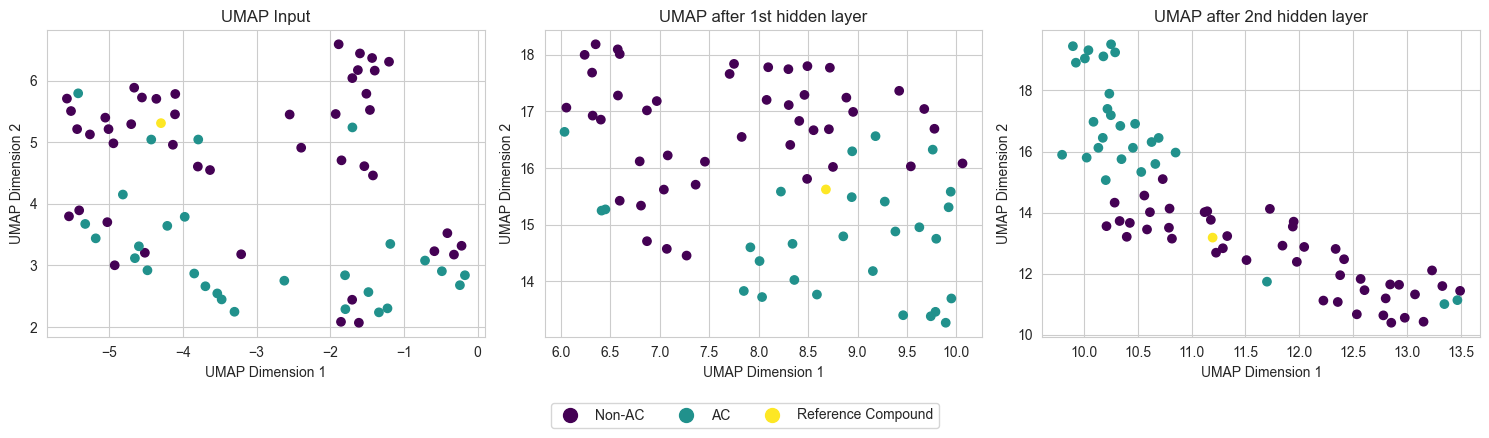

In [200]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

scatter0 = axes[0].scatter(umap_res_init[:, 0], umap_res_init[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('UMAP Input')
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')

scatter1 = axes[1].scatter(umap_res_r3l[:, 0], umap_res_r3l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('UMAP after 1st hidden layer')
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

scatter2 = axes[2].scatter(umap_res_r2l[:, 0], umap_res_r2l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[2].set_title('UMAP after 2nd hidden layer')
axes[2].set_xlabel('UMAP Dimension 1')
axes[2].set_ylabel('UMAP Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig('../analysis/UMAP_Out_part1.png')
plt.tight_layout()
plt.show()

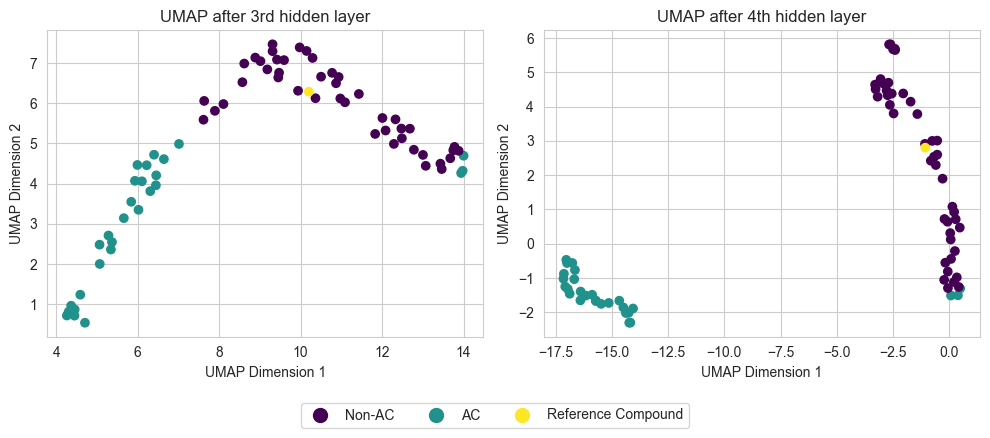

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

scatter3 = axes[0].scatter(umap_res_rl[:, 0], umap_res_rl[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('UMAP after 3rd hidden layer')
axes[0].set_xlabel('UMAP Dimension 1')
axes[0].set_ylabel('UMAP Dimension 2')

scatter4 = axes[1].scatter(umap_res1[:, 0], umap_res1[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('UMAP after 4th hidden layer')
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig('../analysis/UMAP_Out_part2.png')
plt.tight_layout()
plt.show()

# t-SNE

In [97]:
from sklearn.manifold import TSNE

In [114]:
features_array = np.array(features)

In [117]:
tsne_init = TSNE(n_components=2, random_state=42)
tsne_res_init = tsne_init.fit_transform(features_array)

tsne_r3l = TSNE(n_components=2, random_state=42)
tsne_res_r3l = tsne_r3l.fit_transform(out_remove_3last)

tsne_r2l = TSNE(n_components=2, random_state=42)
tsne_res_r2l = tsne_r2l.fit_transform(out_remove_2last)

tsne_rl = TSNE(n_components=2, random_state=42)
tsne_res_rl = tsne_rl.fit_transform(out_remove_last)

tsne_out = TSNE(n_components=2, random_state=42)
tsne_results = tsne_out.fit_transform(out)

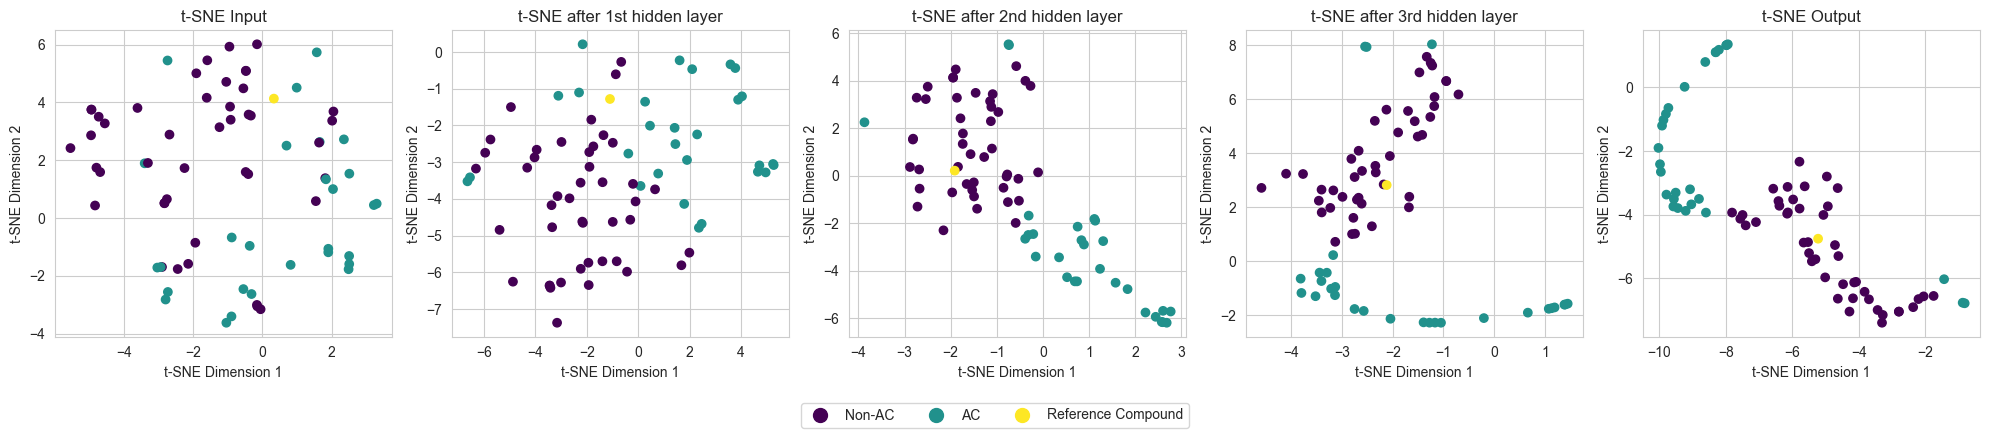

In [204]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  

axes[0].scatter(tsne_res_init[:, 0], tsne_res_init[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('t-SNE Input')
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')

axes[1].scatter(tsne_res_r3l[:, 0], tsne_res_r3l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('t-SNE after 1st hidden layer')
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')

axes[2].scatter(tsne_res_r2l[:, 0], tsne_res_r2l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[2].set_title('t-SNE after 2nd hidden layer')
axes[2].set_xlabel('t-SNE Dimension 1')
axes[2].set_ylabel('t-SNE Dimension 2')

axes[3].scatter(tsne_res_rl[:, 0], tsne_res_rl[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[3].set_title('t-SNE after 3rd hidden layer')
axes[3].set_xlabel('t-SNE Dimension 1')
axes[3].set_ylabel('t-SNE Dimension 2')

axes[4].scatter(tsne_results[:, 0], tsne_results[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[4].set_title('t-SNE Output')
axes[4].set_xlabel('t-SNE Dimension 1')
axes[4].set_ylabel('t-SNE Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.savefig('../analysis/tSNE_Out.png')
plt.show()

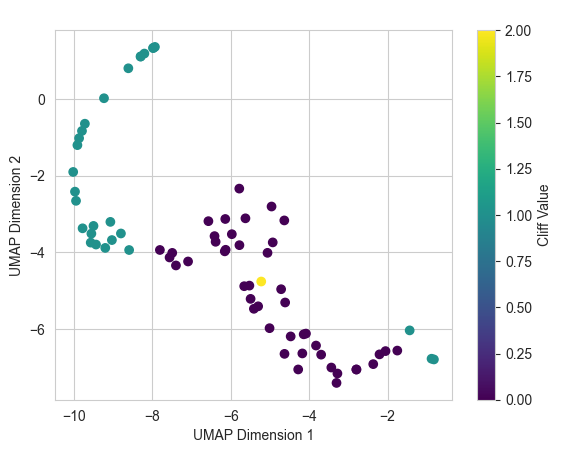

In [121]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = t517_d1_d['cliff'], cmap='viridis')
plt.title(' ')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cliff Value')
plt.show()

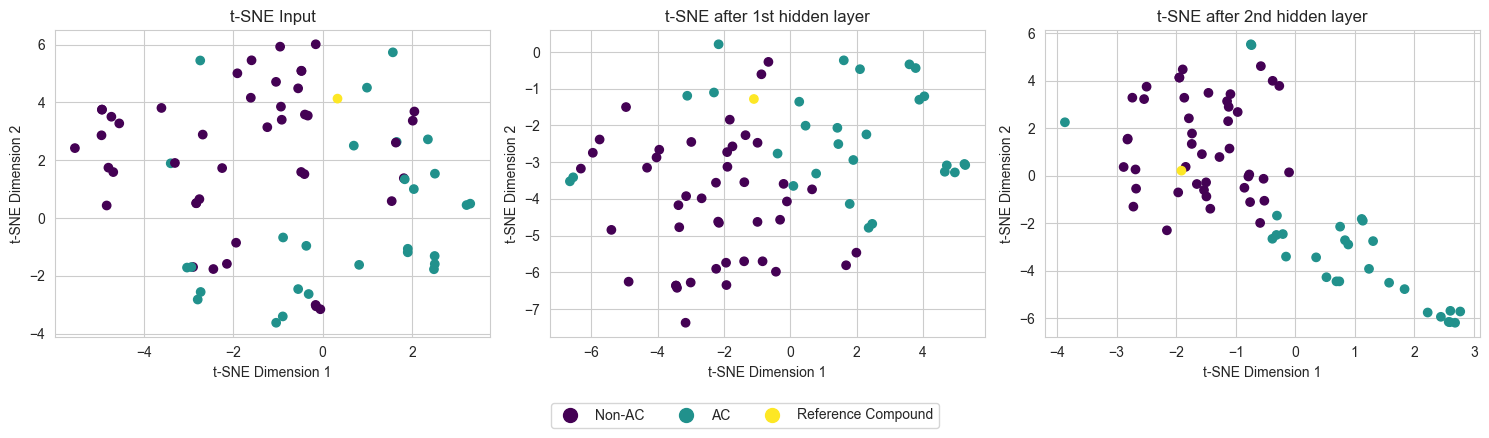

In [170]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

scatter0 = axes[0].scatter(tsne_res_init[:, 0], tsne_res_init[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('t-SNE Input')
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')

scatter1 = axes[1].scatter(tsne_res_r3l[:, 0], tsne_res_r3l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('t-SNE after 1st hidden layer')
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')

scatter2 = axes[2].scatter(tsne_res_r2l[:, 0], tsne_res_r2l[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[2].set_title('t-SNE after 2nd hidden layer')
axes[2].set_xlabel('t-SNE Dimension 1')
axes[2].set_ylabel('t-SNE Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
#plt.savefig('../analysis/tSNE_Out_part1.png')
plt.show()

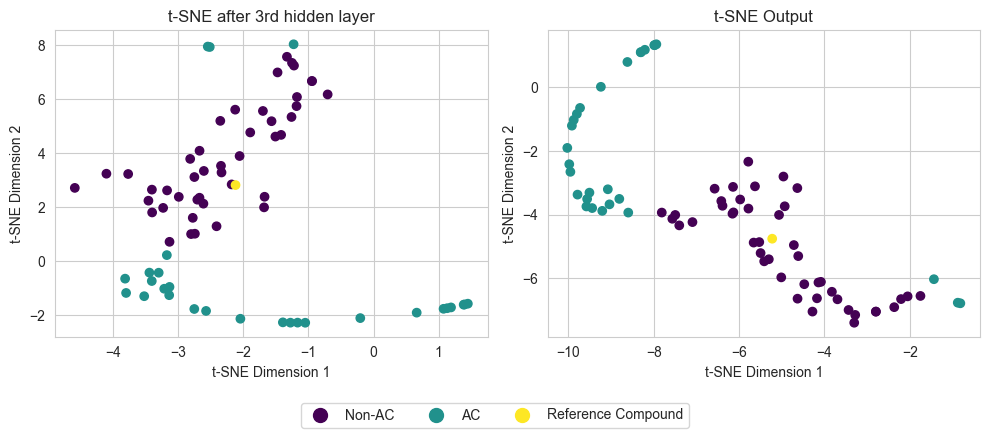

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

scatter3 = axes[0].scatter(tsne_res_rl[:, 0], tsne_res_rl[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[0].set_title('t-SNE after 3rd hidden layer')
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')

scatter4 = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], c=t517_d1_d['cliff'], cmap='viridis')
axes[1].set_title('t-SNE Output')
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')

legend_labels = ['Non-AC', 'AC', 'Reference Compound']
num_unique_values = len(t517_d1_d['cliff'].unique())
viridis_colors = cm.viridis(np.linspace(0, 1, num_unique_values))
legend_colors = viridis_colors[:3]

legend_handles = [Line2D([0], [0], marker='o', markersize=10, color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
#plt.savefig('../analysis/tSNE_Out_part2.png')
plt.show()